### RAG from Scratch
We will build a RAG system from scratch, and architecture is as follows:

![Screenshot 2025-07-12 at 6.41.38 PM.png](<attachment:Screenshot 2025-07-12 at 6.41.38 PM.png>)

And we will implement a simple cosine-similarity search to retrieve the most relevant documents from the corpus.
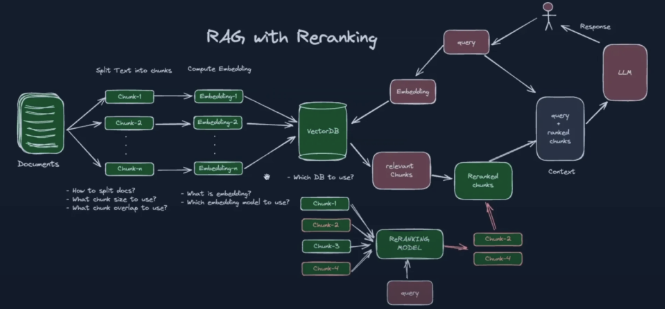

In [14]:
# imports
import numpy as np, math, json, requests
from collections import Counter


In [1]:

corpus_of_documents = [
    "The dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder.",
    "The best performing models also connect the encoder and decoder through an attention mechanism.",
    "We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely.",
    "Experiments on two machine translation tasks show these models to be superior in quality while being more parallelizable and requiring significantly less time to train.",
    "Our model achieves 28.4 BLEU on the WMT 2014 English-to-German translation task, improving over the existing best results, including ensembles, by over 2 BLEU.",
    "On the WMT 2014 English-to-French translation task, our model establishes a new single-model state-of-the-art BLEU score of 41.0 after training for 3.5 days on eight GPUs, a small fraction of the training costs of the best models from the literature.",
    "Recurrent neural networks, long short-term memory and gated recurrent neural networks in particular, have been firmly established as state-of-the-art approaches in sequence modeling and transduction problems such as language modeling and machine translation.",
    "Numerous efforts have since continued to push the boundaries of recurrent language models and encoder-decoder architectures.",
    "Recurrent models typically factor computation along the symbol positions of the input and output sequences.",
    "Aligning the positions to steps in computation time, they generate a sequence of hidden states hₜ as a function of the previous hidden state hₜ₋₁ and the input for position t.",
    "This inherently sequential nature precludes parallelization within training examples, which becomes critical at longer sequence lengths, as memory constraints limit batching across examples.",
    "Recent work has achieved significant improvements in computational efficiency through factorization tricks and conditional computation, while also improving model performance in the latter case.",
    "The fundamental constraint of sequential computation, however, remains.",
    "Attention mechanisms have become an integral part of compelling sequence modeling and transduction models in various tasks, allowing modeling of dependencies without regard to their distance in the input or output sequences.",
    "In all but a few cases, however, such attention mechanisms are used in conjunction with a recurrent network.",
    "In this work we propose the Transformer, a model architecture eschewing recurrence and instead relying entirely on an attention mechanism to draw global dependencies between input and output.",
    "The Transformer allows for significantly more parallelization and can reach a new state of the art in translation quality after being trained for as little as twelve hours on eight P100 GPUs."
]


In [2]:
message = "What is attention mechanism?"

In [3]:
test = "Attention is all you need, you know that!"

In [5]:
message_tok = Counter(message.lower().split(" "))
test_tok = Counter(test.lower().split(" "))

In [7]:
def cosine_similarity(tok1, tok2):
    tok1 = Counter(tok1.lower().split(" "))
    tok2 = Counter(tok2.lower().split(" "))
    dot_product = sum(tok1[token] * tok2[token] for token in tok1.keys() & tok2.keys())
    # calculate the magnitude of tok1 and tok2
    tok1_magnitude = math.sqrt(sum(tok1[token] ** 2 for token in tok1))
    tok2_magnitude = math.sqrt(sum(tok2[token] ** 2 for token in tok2))
    # calculate the cosine similarity
    return dot_product / (tok1_magnitude * tok2_magnitude) if tok1_magnitude * tok2_magnitude != 0 else 0
    
cosine_similarity("hello world", "hello world")

0.9999999999999998

In [8]:
cosine_similarity(message, test)

0.31622776601683794

In [22]:
def response(message, corpus_of_documents):
    similarity_scores = list()
    for document in corpus_of_documents:
        similarity_scores.append(cosine_similarity(message, document))
    return corpus_of_documents[similarity_scores.index(max(similarity_scores))]

relevant_documents = response(message, corpus_of_documents)
# relevant_documents.sort(reverse=True)
relevant_documents

'The best performing models also connect the encoder and decoder through an attention mechanism.'

### Parsing to an locally run LLM (llama3)

In [30]:
url = "http://localhost:11434/api/generate"

In [31]:
prompt = """
You are a helpful assistant. You answer in 2-3 sentences, the user input is: {user_input}
Answer accordingly to the user input based on this information: {context}
"""

In [40]:
data = {"model": "llama3.2", "prompt": prompt.format(user_input=message, context=relevant_documents)}
headers = {"Content-Type": "application/json"}
response = requests.post(url, data=json.dumps(data), headers=headers, stream=True)

In [41]:
msg = list()

for line in response.iter_lines():
    if line.strip():
        msg.append(json.loads(line.decode('utf-8'))['response'])

"".join(msg)

'The attention mechanism is a technique used in deep learning to allow the model to focus on specific parts of the input data when generating output. It helps the model to weigh the importance of different elements of the input sequence, allowing it to capture long-range dependencies and context. This enables the model to make more accurate predictions and generate more coherent output.'